In [1]:

from pyathena import connect
import pandas as pd
import os
import re 

#Assume role before!
conn = connect(aws_access_key_id=os.getenv('AWS_ACCESS_KEY_ID'),
              aws_secret_access_key=os.getenv('AWS_SECRET_ACCESS_KEY'),
              aws_session_token=os.getenv('AWS_SESSION_TOKEN'),
              s3_staging_dir='s3://aws-athena-query-results-878189897945-eu-west-1/',
              region_name='eu-west-1')

query = "SELECT * FROM alpha_health_evermind.events"
df = pd.read_sql(query, conn)
df

/Users/yc00123/.virtualenvs/py3.6.8-data-access/lib/python3.6/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


,createdat,deploymentenv,device,event,product,schema,source,type,unique_name,user,...,view,data,element,error,level,message,stacktrace,year,month,day
0,2019-11-16T08:04:30.729961+00:00,prod,"{id=A01CFEC1-B0EA-4866-8739-940D6A507080, mode...",app_open,"{id=com.wingmanalpha.app.evermind, name=Evermi...",/schemas/events/analytics-device-event/0.json,analytics,track,app_open.null.null,{id=A01CFEC1-B0EA-4866-8739-940D6A507080},...,None,None,None,None,None,None,None,2019,11,16
1,2019-11-16T08:04:31.119303+00:00,prod,"{id=A01CFEC1-B0EA-4866-8739-940D6A507080, mode...",app_resume,"{id=com.wingmanalpha.app.evermind, name=Evermi...",/schemas/events/analytics-device-event/0.json,analytics,track,app_resume.null.null,{id=A01CFEC1-B0EA-4866-8739-940D6A507080},...,None,None,None,None,None,None,None,2019,11,16
2,2019-11-16T08:04:31.122276+00:00,prod,"{id=A01CFEC1-B0EA-4866-8739-940D6A507080, mode...",screen_view,"{id=com.wingmanalpha.app.evermind, name=Evermi...",/schemas/events/analytics-device-event/0.json,analytics,track,screen_view.splash.null,{id=A01CFEC1-B0EA-4866-8739-940D6A507080},...,splash,None,None,None,None,None,None,2019,11,16
3,2019-11-16T08:04:31.124669+00:00,prod,"{id=A01CFEC1-B0EA-4866-8739-940D6A507080, mode...",screen_view,"{id=com.wingmanalpha.app.evermind, name=Evermi...",/schemas/events/analytics-device-event/0.json,analytics,track,screen_view.splash.null,{id=A01CFEC1-B0EA-4866-8739-940D6A507080},...,splash,"{view=splash, question=null, answers=null, sco...",None,None,None,None,None,2019,11,16
4,2019-11-16T08:06:00.430315+00:00,prod,"{id=A01CFEC1-B0EA-4866-8739-940D6A507080, mode...",tap,"{id=com.wingmanalpha.app.evermind, name=Evermi...",/schemas/events/analytics-device-event/0.json,analytics,track,tap.splash.sign-up,{id=A01CFEC1-B0EA-4866-8739-940D6A507080},...,splash,None,sign-up,None,None,None,None,2019,11,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81611,2019-11-27T17:47:58.584187+01:00,prod,"{id=4A34E0CE-3ECC-44C0-8739-0E079A259A10, mode...",app_resume,"{id=com.wingmanalpha.app.evermind, name=Evermi...",/schemas/events/analytics-device-event/0.json,analytics,track,app_resume.home.null,{id=a03308ca-fbaf-4265-8257-b6ecf7ec4d40},...,home,None,None,None,None,None,None,2019,11,27
81612,2019-11-27T00:28:47.444146+00:00,prod,"{id=e422b492c35609ef, model=SM-G970F, platform...",app_resume,"{id=com.wingmanalpha.app.evermind, name=Evermi...",/schemas/events/analytics-device-event/0.json,analytics,track,app_resume.home.null,{id=fc9c6a6e-d60a-4d5c-a6bf-0fc9f644b91b},...,home,None,None,None,None,None,None,2019,11,27
81613,2019-11-27T00:28:59.191603+00:00,prod,"{id=e422b492c35609ef, model=SM-G970F, platform...",app_pause,"{id=com.wingmanalpha.app.evermind, name=Evermi...",/schemas/events/analytics-device-event/0.json,analytics,track,app_pause.home.null,{id=fc9c6a6e-d60a-4d5c-a6bf-0fc9f644b91b},...,home,None,None,None,None,None,None,2019,11,27
81614,2019-11-27T09:10:28.714299+00:00,prod,"{id=6A6006D4-682A-4352-BD83-D116007097E4, mode...",app_pause,"{id=com.wingmanalpha.app.evermind, name=Evermi...",/schemas/events/analytics-device-event/0.json,analytics,track,app_pause.activity.null,{id=b313ea43-b62a-4405-b32b-c809d08529a1},...,activity,None,None,None,None,None,None,2019,11,27


In [2]:
df['event'].unique()

array(['app_open', 'app_resume', 'screen_view', 'tap', 'app_pause', None,
       'impression', 'activity_results', 'media_pause', 'select_date',
       'assessment', 'media_finish', 'media_play',
       'app_resume_from_notification', 'app_open_from_notification',
       'media_restart'], dtype=object)

## Setting the timestamp as index

In [3]:
df['createdat']=pd.to_datetime(df['createdat'], utc=True)
df.set_index('createdat', inplace=True)
df.index = df.index.floor('1H')
df['week_start'] = df.index.to_period('W').start_time

/Users/yc00123/.virtualenvs/py3.6.8-data-access/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1102: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


## Function to calculate the score of the PSS

In [4]:
df.columns

Index(['deploymentenv', 'device', 'event', 'product', 'schema', 'source',
       'type', 'unique_name', 'user', 'userid', 'view', 'data', 'element',
       'error', 'level', 'message', 'stacktrace', 'year', 'month', 'day',
       'week_start'],
      dtype='object')

In [5]:
df[df['event']=='assessment']['data'].iloc[0].split()

['{view=null,',
 'question=null,',
 'answers=[2,',
 '2,',
 '2,',
 '1,',
 '2,',
 '3,',
 '3,',
 '2,',
 '1,',
 '2],',
 'score=20,',
 'programme-id=null,',
 'programme-title=null,',
 'activity-id=null,',
 'activity-title=null,',
 'slide=null,',
 'page=null,',
 'input-id=null,',
 'feedback=null,',
 'audio-id=null,',
 'duration=null,',
 'position=null,',
 'level=null,',
 'module-id=null,',
 'module-title=null,',
 'action=null,',
 'labels=null,',
 'labels-selected=null,',
 'records-done=null,',
 'questionsanswered=null,',
 'notification=null,',
 'date=null,',
 'programme-state=null,',
 'step=null,',
 'suggested=null,',
 'programme-step=null,',
 'answer-id=null,',
 'aswer-value=null,',
 'answer-ids=null,',
 'answer-values=null,',
 'example=null,',
 'numofdaysago=null,',
 'iscompleted=null,',
 'group=null}']

In [6]:
assessment20 = df[(df['event']=='assessment')&(df.index.year == 2020)]['data']

In [7]:
assessment19 = df[(df['event']=='assessment')&(df.index.year == 2019)]['data']

In [8]:
def getScore(s):
    n = re.search('score=(\d+)', s)
    score = int(n.group(1))
    return score

In [9]:
def getAnswers(s):
    m = re.search(r"\[(.*)\]", s).group()
    a = re.sub('\D',' ',m)
    answers = a.split()
    return answers

In [10]:
scores19 = assessment19.apply(getScore)

In [11]:
scores20 = assessment20.apply(getScore)

In [12]:
assessment19.apply(getAnswers)

createdat
2019-12-30 13:00:00+00:00    [2, 2, 2, 1, 2, 3, 3, 2, 1, 2]
2019-12-28 22:00:00+00:00    [2, 2, 2, 2, 1, 1, 2, 1, 1, 2]
2019-12-20 08:00:00+00:00    [2, 2, 2, 2, 2, 0, 2, 2, 3, 1]
2019-12-19 06:00:00+00:00    [1, 2, 3, 2, 2, 3, 3, 2, 1, 2]
2019-11-15 13:00:00+00:00    [2, 1, 2, 3, 3, 2, 2, 2, 2, 2]
                                          ...              
2019-11-27 21:00:00+00:00    [1, 3, 4, 3, 2, 3, 3, 4, 3, 3]
2019-11-29 08:00:00+00:00    [0, 1, 3, 0, 1, 3, 2, 3, 2, 1]
2019-11-27 10:00:00+00:00    [2, 0, 2, 1, 2, 2, 1, 1, 2, 1]
2019-11-27 17:00:00+00:00    [1, 2, 2, 2, 3, 2, 2, 2, 2, 1]
2019-11-27 12:00:00+00:00    [1, 2, 1, 1, 2, 1, 1, 1, 1, 1]
Name: data, Length: 74, dtype: object

[Text(0.5, 0, 'Perceived Stress Score')]

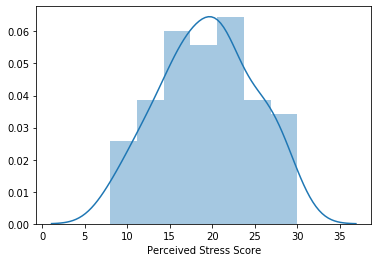

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
figure = sns.distplot(scores19)
figure.set(xlabel = 'Perceived Stress Score')


[Text(0.5, 0, 'Perceived Stress Score')]

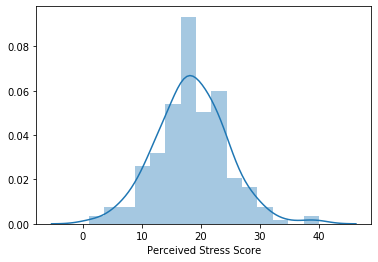

In [14]:
figure = sns.distplot(scores20)
figure.set(xlabel = 'Perceived Stress Score')

## Scores over time for individual users

In [15]:
df.userid.unique()

array(['A01CFEC1-B0EA-4866-8739-940D6A507080', 'c57c753487db7965',
       '8041B5EB-7984-4CB9-9A58-4EFDC84F265D',
       '46dc9b12-42c4-4ba7-8c1c-9d1404e0903a', '812c2e41c64d3b51',
       '64bfce03-6337-4208-a1ac-d92269faf24b', '70a94f23afa7b234', '',
       'a03308ca-fbaf-4265-8257-b6ecf7ec4d40',
       '4A34E0CE-3ECC-44C0-8739-0E079A259A10',
       '902FEAEE-E290-4424-BA44-04F70A77DC9D',
       'E2D7D48D-08C5-4228-B9D6-7A9830FCBB48',
       '38512D7C-8F81-4AD3-B7B9-46963C0635FC', 'c65dcc742f28bd0f',
       'fc9c6a6e-d60a-4d5c-a6bf-0fc9f644b91b', 'e422b492c35609ef',
       '6a252400-4aaf-46ab-aeb7-6788d4bb140f', 'a9a1e3f5498c6aac',
       '34224694-17A3-4806-ACBF-AE598912E003',
       '9130c977-71cd-4b6e-a8e0-6d269e2e0022',
       'E9ACE06B-2605-4FAA-A6F0-C016743328FC',
       '8F8A3E40-C1AF-4D0C-8456-72153A451747', 'c481f6cb3a459905',
       '422656486535f884', 'ba7c625f-8845-492b-ad84-0e396fd26d5a',
       '6359B6AD-DBA0-4DCF-8166-BB8ABACDC814',
       '84AC2979-EF1E-4C68-ACD1-0AEB5

In [16]:
assessmentUser = df[(df['event']=='assessment')&(df.userid == 'b9226e9d-f839-46e9-8e2b-e27fa42736aa')]['data']

In [17]:
assessmentUser.apply(getScore)

createdat
2019-12-05 12:00:00+00:00    18
2019-11-20 15:00:00+00:00    30
2019-11-27 21:00:00+00:00    29
Name: data, dtype: int64

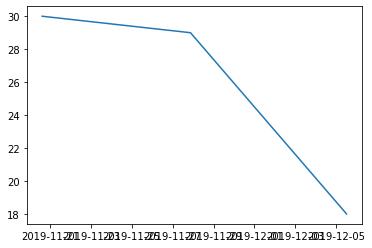

In [18]:
import matplotlib.pyplot as plt
plt.plot(assessmentUser.apply(getScore).sort_index())

## New array with the scores of all users

In [19]:
userids = df.userid.unique()
scores = []
for i in range(len(userids)):
    x = df[(df['event']=='assessment')&(df.userid == userids[i])]['data']
    scores.append([userids[i],(x.apply(getScore).sort_index(0))]) 
 

In [20]:
dfScores = pd.DataFrame(scores, columns=['userid', 'score']) 

In [21]:
scores

[['A01CFEC1-B0EA-4866-8739-940D6A507080',
  Series([], Name: data, dtype: object)],
 ['c57c753487db7965', Series([], Name: data, dtype: object)],
 ['8041B5EB-7984-4CB9-9A58-4EFDC84F265D',
  Series([], Name: data, dtype: object)],
 ['46dc9b12-42c4-4ba7-8c1c-9d1404e0903a',
  createdat
  2019-12-18 17:00:00+00:00    20
  2019-12-30 13:00:00+00:00    20
  2020-01-10 03:00:00+00:00    25
  Name: data, dtype: int64],
 ['812c2e41c64d3b51', Series([], Name: data, dtype: object)],
 ['64bfce03-6337-4208-a1ac-d92269faf24b',
  createdat
  2019-11-26 17:00:00+00:00    23
  2019-12-05 17:00:00+00:00    29
  2019-12-20 08:00:00+00:00    18
  2019-12-29 16:00:00+00:00    17
  Name: data, dtype: int64],
 ['70a94f23afa7b234', Series([], Name: data, dtype: object)],
 ['', Series([], Name: data, dtype: object)],
 ['a03308ca-fbaf-4265-8257-b6ecf7ec4d40',
  createdat
  2020-02-17 13:00:00+00:00    11
  Name: data, dtype: int64],
 ['4A34E0CE-3ECC-44C0-8739-0E079A259A10',
  Series([], Name: data, dtype: objec

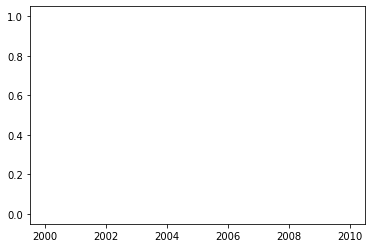

In [27]:
plt.plot(scores[2][1])

In [28]:
df[(df['event']=='impression')]['data'][3]

'{view=null, question=null, answers=null, score=null, programme-id=null, programme-title=null, activity-id=250d838a-54c3-4aae-bf6f-5a6057890aa1, activity-title=Deep belly breathing, slide=1, page=null, input-id=null, feedback=null, audio-id=null, duration=null, position=null, level=null, module-id=null, module-title=null, action=null, labels=null, labels-selected=null, records-done=null, questionsanswered=null, notification=null, date=null, programme-state=null, step=null, suggested=null, programme-step=null, answer-id=null, aswer-value=null, answer-ids=null, answer-values=null, example=null, numofdaysago=null, iscompleted=null, group=null}'

In [29]:
a = df[(df['event']=='media_pause')&(df.userid == 'b9226e9d-f839-46e9-8e2b-e27fa42736aa')]['data'][0].split(",")

In [30]:
df.view

createdat
2019-11-16 08:00:00+00:00        None
2019-11-16 08:00:00+00:00        None
2019-11-16 08:00:00+00:00      splash
2019-11-16 08:00:00+00:00      splash
2019-11-16 08:00:00+00:00      splash
                               ...   
2019-11-27 16:00:00+00:00        home
2019-11-27 00:00:00+00:00        home
2019-11-27 00:00:00+00:00        home
2019-11-27 09:00:00+00:00    activity
2019-11-27 09:00:00+00:00    activity
Name: view, Length: 81616, dtype: object

In [31]:
host_sum_df =(df
               .groupby('event')
               .count()
               .sort_values(by='unique_name',ascending=False))

host_sum_df

,deploymentenv,device,product,schema,source,type,unique_name,user,userid,view,data,element,error,level,message,stacktrace,year,month,day,week_start
event,,,,,,,,,,,,,,,,,,,,
screen_view,26507,26507,26507,26507,26507,26507,26507,26507,26507,26507,8988,1365,0,0,0,0,26507,26507,26507,26507
tap,24061,24061,24061,24061,24061,24061,24061,24061,24061,24061,18677,24061,0,0,0,0,24061,24061,24061,24061
impression,13441,13441,13441,13441,13441,13441,13441,13441,13441,13441,12588,9601,0,0,0,0,13441,13441,13441,13441
app_pause,4446,4446,4446,4446,4446,4446,4446,4446,4446,4394,0,0,0,0,0,0,4446,4446,4446,4446
app_resume,2953,2953,2953,2953,2953,2953,2953,2953,2953,2827,0,0,0,0,0,0,2953,2953,2953,2953
app_open,1784,1784,1784,1784,1784,1784,1784,1784,1784,0,0,0,0,0,0,0,1784,1784,1784,1784
media_finish,868,868,868,868,868,868,868,868,868,868,868,868,0,0,0,0,868,868,868,868
activity_results,413,413,413,413,413,413,413,413,413,413,413,0,0,0,0,0,413,413,413,413
media_play,288,288,288,288,288,288,288,288,288,288,288,288,0,0,0,0,288,288,288,288


In [32]:
df['hour'] = df.index.hour

In [33]:
df['hour']

createdat
2019-11-16 08:00:00+00:00     8
2019-11-16 08:00:00+00:00     8
2019-11-16 08:00:00+00:00     8
2019-11-16 08:00:00+00:00     8
2019-11-16 08:00:00+00:00     8
                             ..
2019-11-27 16:00:00+00:00    16
2019-11-27 00:00:00+00:00     0
2019-11-27 00:00:00+00:00     0
2019-11-27 09:00:00+00:00     9
2019-11-27 09:00:00+00:00     9
Name: hour, Length: 81616, dtype: int64

## Events during the day

In [47]:
x = df[(df['event']=='assessment')]['data']
x = x.apply(getScore)

In [48]:
x = df.copy()
x =(df
        .groupby('hour')
        .count()
        .sort_values(by='hour',ascending=True))

In [49]:
x

,deploymentenv,device,event,product,schema,source,type,unique_name,user,userid,...,data,element,error,level,message,stacktrace,year,month,day,week_start
hour,,,,,,,,,,,,,,,,,,,,,
0,2503,2503,1784,2503,2503,2503,1784,1784,2503,2503,...,966,816,719,719,719,719,2503,2503,2503,2503
1,736,736,706,736,736,736,706,706,736,736,...,435,340,30,30,30,30,736,736,736,736
2,135,135,135,135,135,135,135,135,135,135,...,45,54,0,0,0,0,135,135,135,135
3,139,139,119,139,139,139,119,119,139,139,...,64,46,20,20,20,20,139,139,139,139
4,170,170,170,170,170,170,170,170,170,170,...,97,80,0,0,0,0,170,170,170,170
5,232,232,232,232,232,232,232,232,232,232,...,96,97,0,0,0,0,232,232,232,232
6,1412,1412,1305,1412,1412,1412,1305,1305,1412,1412,...,573,515,107,107,107,107,1412,1412,1412,1412
7,1875,1875,1872,1875,1875,1875,1872,1872,1875,1875,...,1106,879,3,3,3,3,1875,1875,1875,1875
8,2632,2632,2617,2632,2632,2632,2617,2617,2632,2632,...,1344,1276,15,15,15,15,2632,2632,2632,2632


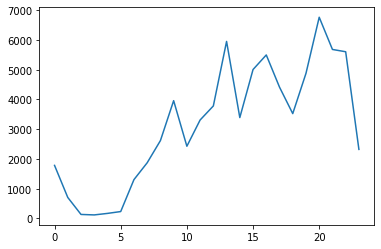

In [36]:

plt.plot(x['event'])

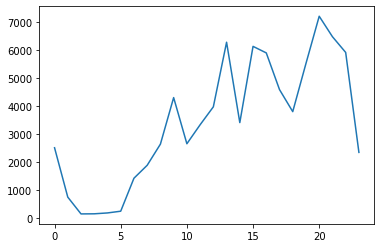

In [37]:
plt.plot(x['userid'])

In [44]:
def outputPerUser(df, cat):
    df.dropna(subset = [cat], inplace=True)
    
    df.sort_values(["userid", cat])
    valid_ids = df['userid'].unique()
    new = df[(df['userid'].isin(valid_ids))]
    new = new.groupby('userid')
    new = new[cat].agg(list)
    new = new.to_frame()[cat]
    newdf = new.to_frame()   
    return newdf

In [45]:
x = df.copy()
x = outputPerUser(x, 'hour')


In [46]:
x

,hour
userid,
,"[8, 8, 8, 8, 8, 8, 16, 16, 16, 16, 16, 16, 16,..."
00da7219-c1bd-4b67-acc5-fa6da0668d05,"[21, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,..."
01021dae-990a-4713-b087-a4208dde3f3d,"[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1..."
0110e85c-8193-499d-8e1b-8cb5d3577499,"[10, 12, 12, 12, 12, 12, 12, 12, 12, 12]"
02de1825-88b8-4bd7-a473-49620e9a7e60,"[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1..."
...,...
fd0bc52e-d1a4-405a-bd01-300a3d430209,"[8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ..."
fd34dca14dae2587,"[10, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 1..."
fd6b7f72-4220-4e08-a230-94c6cbe2fe0d,"[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ..."


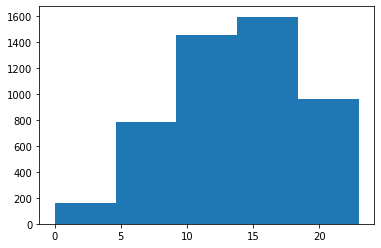

In [41]:
x = [x['hour'][0]]
plt.hist(x, bins = 5)
plt.show()

In [42]:
weekdf = df.copy()
weekdf.groupby(['week_start', 'userid']).nunique()

deploymentenv  device  event  \
week_start userid                                                               
2019-11-11 061f2a442a4fcf66                                  1       1      3   
           07B2B14E-7728-4DB8-8BEC-EC03B0B013DB              1       1      4   
           2251df37935a0656                                  1       1      3   
           24AC0515-1DDB-409B-A8B0-64F16A0A816A              1       1      3   
           41b2ab47f20c0028                                  1       1      3   
...                                                        ...     ...    ...   
2020-03-02 aa55c25e-505d-4e85-b642-65ecb4249b3b              1       5      4   
           ac8f82d9-f1a1-44ce-8f7d-04672fbef7f6              1       3      5   
           ed9e1e97-6eee-430e-bfb1-916e8a91354e              1       1      4   
           f26b45f7-1b81-4d9c-8e14-b900bea9e2fd              1       1      5   
           f5ff9aca-0969-432b-994f-e3ef1649ad04              1       1      7   

                                                 product  schema  source  \
week_start userid                                                          
2019-11-11 061f2a442a4fcf66                            1       1       1   
           07B2B14E-7728-4DB8-8BEC-EC03B0B013DB        1       1       1   
           2251df37935a0656                            1       1       1   
           24AC0515-1DDB-409B-A8B0-64F16A0A816A        1       1       1   
           41b2ab47f20c0028                            1       1       1   
...                                                  ...     ...     ...   
2020-03-02 aa55c25e-505d-4e85-b642-65ecb4249b3b        1       2       2   
           ac8f82d9-f1a1-44ce-8f7d-04672fbef7f6        1       1       1   
           ed9e1e97-6eee-430e-bfb1-916e8a91354e        1       1       1   
           f26b45f7-1b81-4d9c-8e14-b900bea9e2fd        1       1       1   
           f5ff9aca-0969-432b-994f-e3ef1649ad04        1       1       1   

                                                 type  unique_name  user  \
week_start userid                                                          
2019-11-11 061f2a442a4fcf66                         1            4     1   
           07B2B14E-7728-4DB8-8BEC-EC03B0B013DB     1           10     1   
           2251df37935a0656                         1            5     1   
           24AC0515-1DDB-409B-A8B0-64F16A0A816A     1            3     1   
           41b2ab47f20c0028                         1            4     1   
...                                               ...          ...   ...   
2020-03-02 aa55c25e-505d-4e85-b642-65ecb4249b3b     1           28     1   
           ac8f82d9-f1a1-44ce-8f7d-04672fbef7f6     1           36     1   
           ed9e1e97-6eee-430e-bfb1-916e8a91354e     1            7     1   
           f26b45f7-1b81-4d9c-8e14-b900bea9e2fd     1           30     1   
           f5ff9aca-0969-432b-994f-e3ef1649ad04     1           60     1   

                                                 userid  ...  element  error  \
week_start userid                                        ...                   
2019-11-11 061f2a442a4fcf66                           1  ...        1      0   
           07B2B14E-7728-4DB8-8BEC-EC03B0B013DB       1  ...        4      0   
           2251df37935a0656                           1  ...        2      0   
           24AC0515-1DDB-409B-A8B0-64F16A0A816A       1  ...        0      0   
           41b2ab47f20c0028                           1  ...        1      0   
...                                                 ...  ...      ...    ...   
2020-03-02 aa55c25e-505d-4e85-b642-65ecb4249b3b       1  ...       14      1   
           ac8f82d9-f1a1-44ce-8f7d-04672fbef7f6       1  ...       17      0   
           ed9e1e97-6eee-430e-bfb1-916e8a91354e       1  ...        2      0   
           f26b45f7-1b81-4d9c-8e14-b900bea9e2fd       1  ...       14      0   
           f5ff9aca-0969-432b-994f-e3ef1649ad04       1  